# Crafting a Story - Major League Baseball

Professional baseball is considered to be founded in 1869 when the Cincinnati Red Stockings were established as the first professional team. There have been many different teams and leagues since then, and I've been interested in seeing how players have changed over the years.

To see how players have changed I'm going to look at player stats such as number of runs, number of home runs, bases stolen and number of times caught stealing. Then for pitchers: number of hits and HR allowed per pitcher as well as number of strikeouts.

Possible to look into in the future: how has salary changed over the years? has it been proportional to the rise if player ability, or shot up on its own.

### Initial Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
people = pd.read_csv('People.csv')
people.head()

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01
1,aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,2021.0,1.0,22.0,...,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01
2,aaronto01,1939.0,8.0,5.0,USA,AL,Mobile,1984.0,8.0,16.0,...,Aaron,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26,aarot101,aaronto01
3,aasedo01,1954.0,9.0,8.0,USA,CA,Orange,NaN,NaN,NaN,...,Aase,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,aased001,aasedo01
4,abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,NaN,NaN,NaN,...,Abad,Fausto Andres,184.0,73.0,L,L,2001-09-10,2006-04-13,abada001,abadan01


In [3]:
batting = pd.read_csv('Batting.csv')
batting

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,...,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,...,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,0.0
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,...,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,1.0
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,...,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,0.0
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,...,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110490,zimmejo02,2021,1,MIL,NL,2,1,0,0,0,...,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0
110491,zimmeky01,2021,1,KCA,AL,52,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
110492,zimmery01,2021,1,WAS,NL,110,255,27,62,16,...,46.0,0.0,0.0,16,77.0,0.0,0.0,0.0,2.0,9.0
110493,zuberty01,2021,1,KCA,AL,31,1,0,0,0,...,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0


In [4]:
batting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110495 entries, 0 to 110494
Data columns (total 22 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   playerID  110495 non-null  object 
 1   yearID    110495 non-null  int64  
 2   stint     110495 non-null  int64  
 3   teamID    110495 non-null  object 
 4   lgID      109758 non-null  object 
 5   G         110495 non-null  int64  
 6   AB        110495 non-null  int64  
 7   R         110495 non-null  int64  
 8   H         110495 non-null  int64  
 9   2B        110495 non-null  int64  
 10  3B        110495 non-null  int64  
 11  HR        110495 non-null  int64  
 12  RBI       109739 non-null  float64
 13  SB        108127 non-null  float64
 14  CS        86954 non-null   float64
 15  BB        110495 non-null  int64  
 16  SO        108395 non-null  float64
 17  IBB       73845 non-null   float64
 18  HBP       107679 non-null  float64
 19  SH        104427 non-null  float64
 20  SF  

In [5]:
batting = batting.dropna(subset = ['lgID'])

In [6]:
pitching = pd.read_csv('Pitching.csv')
pitching

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
0,bechtge01,1871,1,PH1,NaN,1,2,3,3,2,...,NaN,7,NaN,0,146.0,0,42,NaN,NaN,NaN
1,brainas01,1871,1,WS3,NaN,12,15,30,30,30,...,NaN,7,NaN,0,1291.0,0,292,NaN,NaN,NaN
2,fergubo01,1871,1,NY2,NaN,0,0,1,0,0,...,NaN,2,NaN,0,14.0,0,9,NaN,NaN,NaN
3,fishech01,1871,1,RC1,NaN,4,16,24,24,22,...,NaN,20,NaN,0,1080.0,1,257,NaN,NaN,NaN
4,fleetfr01,1871,1,NY2,NaN,0,1,1,1,1,...,NaN,0,NaN,0,57.0,0,21,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49425,zeuchtj01,2021,1,TOR,AL,0,2,5,3,0,...,0.0,0,0.0,0,74.0,0,16,0.0,0.0,2.0
49426,zimmebr02,2021,1,BAL,AL,4,5,14,13,0,...,0.0,0,2.0,1,285.0,0,37,1.0,2.0,3.0
49427,zimmejo02,2021,1,MIL,NL,0,0,2,0,0,...,0.0,0,1.0,0,26.0,1,5,0.0,0.0,1.0
49428,zimmeky01,2021,1,KCA,AL,4,1,52,2,0,...,1.0,9,0.0,0,223.0,9,32,0.0,4.0,13.0


In [7]:
pitching.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49430 entries, 0 to 49429
Data columns (total 30 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   playerID  49430 non-null  object 
 1   yearID    49430 non-null  int64  
 2   stint     49430 non-null  int64  
 3   teamID    49430 non-null  object 
 4   lgID      49298 non-null  object 
 5   W         49430 non-null  int64  
 6   L         49430 non-null  int64  
 7   G         49430 non-null  int64  
 8   GS        49430 non-null  int64  
 9   CG        49430 non-null  int64  
 10  SHO       49430 non-null  int64  
 11  SV        49430 non-null  int64  
 12  IPouts    49430 non-null  int64  
 13  H         49430 non-null  int64  
 14  ER        49430 non-null  int64  
 15  HR        49430 non-null  int64  
 16  BB        49430 non-null  int64  
 17  SO        49430 non-null  int64  
 18  BAOpp     44989 non-null  float64
 19  ERA       49333 non-null  float64
 20  IBB       34852 non-null  fl

In [8]:
pitching = pitching.dropna(subset = ['lgID'])

I'm interested in data by year, so going to group batting and pitching dataframes by year.

In [9]:
batting_year = batting.groupby(['yearID']).sum()

#want to know how many players are included in each year's stats and how many teams are included
batting_year['num_players'] = batting.groupby('yearID')['playerID'].nunique()
batting_year['num_teams'] = batting.groupby('yearID')['teamID'].nunique()
batting_year

,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,num_players,num_teams
yearID,,,,,,,,,,,,,,,,,,,,
1876,127,4696,20121,3066,5338,633,181,40,1984.0,0.0,0.0,336,589.0,0.0,0.0,0.0,0.0,0.0,121,8
1877,106,3247,13667,2040,3705,431,204,24,1410.0,0.0,0.0,345,726.0,0.0,0.0,0.0,0.0,0.0,92,6
1878,83,3319,13644,1904,3539,481,132,23,1331.0,0.0,0.0,364,1081.0,0.0,0.0,0.0,0.0,0.0,77,6
1879,135,5795,24155,3409,6171,958,317,58,2357.0,0.0,0.0,508,1843.0,0.0,0.0,0.0,0.0,0.0,119,8
1880,143,6157,24301,3191,5946,980,328,62,2223.0,0.0,0.0,740,1993.0,0.0,0.0,0.0,0.0,0.0,127,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,1638,70743,165567,22582,42215,8397,795,6105,21558.0,2527.0,934.0,15829,40104.0,970.0,1763.0,925.0,1168.0,3804.0,1358,30
2018,1705,71590,165432,21630,41018,8264,847,5585,20606.0,2474.0,958.0,15686,41207.0,929.0,1922.0,823.0,1235.0,3457.0,1379,30
2019,1742,71684,166651,23467,42039,8531,785,6776,22471.0,2280.0,832.0,15895,42823.0,753.0,1984.0,776.0,1150.0,3463.0,1410,30


Im going to be looking at homeruns (HR), runs (R), hits (H), stolen bases (SB) and caught stealing (CS) per player as well as the overall total trends, so I'm going to add the per player numbers to new columns in the batting dataset.

In [10]:
batting_year['HR_perplayer'] = batting_year['HR'] / batting_year['num_players']
batting_year['R_perplayer'] = batting_year['R'] / batting_year['num_players']
batting_year['H_perplayer'] = batting_year['H'] / batting_year['num_players']
batting_year['SB_perplayer'] = batting_year['SB'] / batting_year['num_players']
batting_year['CS_perplayer'] = batting_year['CS'] / batting_year['num_players']
batting_year.reset_index(inplace = True)
batting_year

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,...,SH,SF,GIDP,num_players,num_teams,HR_perplayer,R_perplayer,H_perplayer,SB_perplayer,CS_perplayer
0,1876,127,4696,20121,3066,5338,633,181,40,1984.0,...,0.0,0.0,0.0,121,8,0.330579,25.338843,44.115702,0.000000,0.000000
1,1877,106,3247,13667,2040,3705,431,204,24,1410.0,...,0.0,0.0,0.0,92,6,0.260870,22.173913,40.271739,0.000000,0.000000
2,1878,83,3319,13644,1904,3539,481,132,23,1331.0,...,0.0,0.0,0.0,77,6,0.298701,24.727273,45.961039,0.000000,0.000000
3,1879,135,5795,24155,3409,6171,958,317,58,2357.0,...,0.0,0.0,0.0,119,8,0.487395,28.647059,51.857143,0.000000,0.000000
4,1880,143,6157,24301,3191,5946,980,328,62,2223.0,...,0.0,0.0,0.0,127,8,0.488189,25.125984,46.818898,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,2017,1638,70743,165567,22582,42215,8397,795,6105,21558.0,...,925.0,1168.0,3804.0,1358,30,4.495582,16.628866,31.086156,1.860825,0.687776
142,2018,1705,71590,165432,21630,41018,8264,847,5585,20606.0,...,823.0,1235.0,3457.0,1379,30,4.050036,15.685279,29.744743,1.794054,0.694706
143,2019,1742,71684,166651,23467,42039,8531,785,6776,22471.0,...,776.0,1150.0,3463.0,1410,30,4.805674,16.643262,29.814894,1.617021,0.590071
144,2020,1433,26721,59030,8344,14439,2823,241,2304,7978.0,...,126.0,402.0,1237.0,1289,30,1.787432,6.473235,11.201707,0.686579,0.226532


In [11]:
#doing the same thing with pitchers
pitching_year = pitching.groupby(['yearID']).sum()
pitching_year['num_players'] = pitching.groupby('yearID')['playerID'].nunique()
pitching_year['num_teams'] = pitching.groupby('yearID')['teamID'].nunique()
pitching_year.reset_index(inplace = True)
pitching_year

,yearID,stint,W,L,G,GS,CG,SHO,SV,IPouts,...,HBP,BK,BFP,GF,R,SH,SF,GIDP,num_players,num_teams
0,1876,34,257,257,570,520,472,46,13,14218,...,0.0,0,20536.0,48,3066,0.0,0.0,0.0,34,8
1,1877,19,177,177,395,360,326,20,4,9723,...,0.0,0,14009.0,34,2040,0.0,0.0,0.0,19,6
2,1878,23,180,180,385,368,352,25,1,9972,...,0.0,0,14017.0,16,1904,0.0,0.0,0.0,21,6
3,1879,27,316,316,676,642,609,44,2,17391,...,0.0,0,24666.0,33,3409,0.0,0.0,0.0,25,8
4,1880,34,332,332,756,680,608,51,13,18094,...,0.0,0,25041.0,72,3191,0.0,0.0,0.0,32,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,2017,928,2430,2430,20517,4860,59,27,1179,129771,...,1763.0,155,185295.0,4801,22582,925.0,1168.0,3804.0,755,30
142,2018,999,2431,2431,21197,4862,42,19,1244,130467,...,1922.0,151,185139.0,4820,21630,823.0,1235.0,3457.0,799,30
143,2019,1037,2429,2429,21429,4858,45,26,1180,130270,...,1984.0,153,186517.0,4813,23467,776.0,1150.0,3463.0,831,30
144,2020,807,898,898,7959,1796,29,12,422,46406,...,821.0,63,66506.0,1767,8344,126.0,402.0,1238.0,735,30


Have the information that I want from the datasets, now to look at trends.

## Batting Trends

Answering questions like: have the number of home runs increased over the years? What about number of hits? Number of home runs? Has stealing bases become more popular?

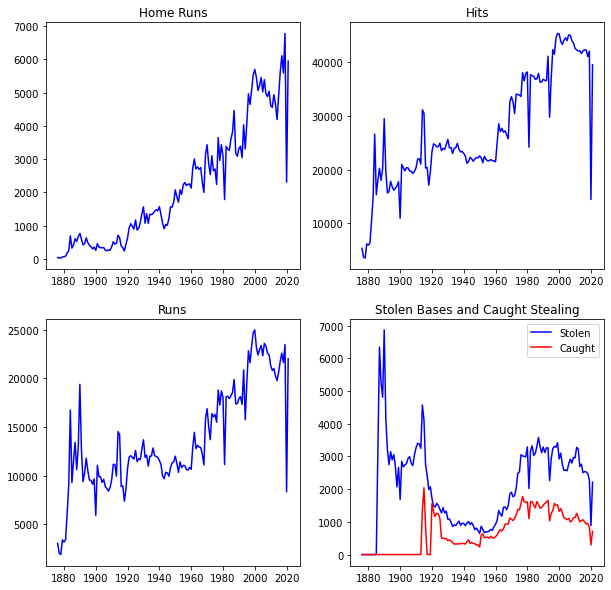

In [12]:
fig, ax = plt.subplots(2,2, figsize = (10,10))
ax[0,0].plot(batting_year['yearID'], batting_year['HR'], color = 'b')
ax[0,0].set_title('Home Runs')
ax[1,0].plot(batting_year['yearID'], batting_year['R'], color = 'b')
ax[1,0].set_title('Runs')
ax[0,1].plot(batting_year['yearID'], batting_year['H'], color = 'b')
ax[0,1].set_title('Hits')
ax[1,1].plot(batting_year['yearID'], batting_year['SB'], color = 'b', label = 'Stolen')
ax[1,1].plot(batting_year['yearID'], batting_year['CS'], color = 'r', label = 'Caught')
ax[1,1].set_title('Stolen Bases and Caught Stealing')
ax[1,1].legend()
plt.show()

It makes sense that there would be an increase in homerunes, runs and hits. But I want to see if the number per player increases as well, or if the increase is simply due to the increase in people playing (121 in 1876 vs 1508 in 2021).

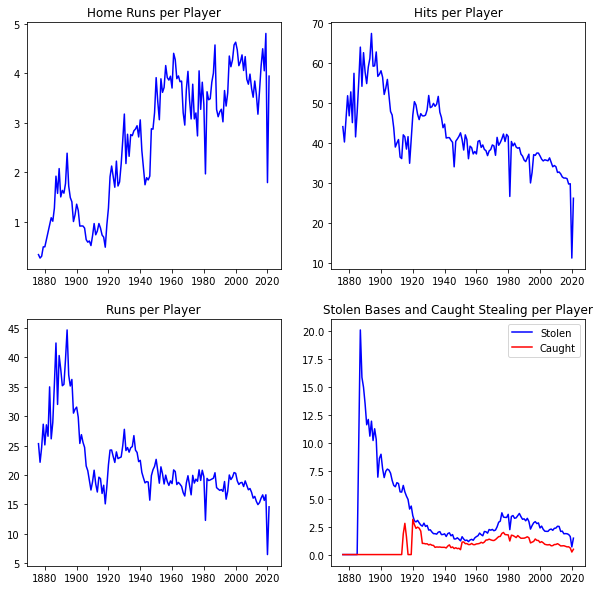

In [13]:
fig, ax = plt.subplots(2,2, figsize = (10,10))
ax[0,0].plot(batting_year['yearID'], batting_year['HR_perplayer'], color = 'b')
ax[0,0].set_title('Home Runs per Player')
ax[1,0].plot(batting_year['yearID'], batting_year['R_perplayer'], color = 'b')
ax[1,0].set_title('Runs per Player')
ax[0,1].plot(batting_year['yearID'], batting_year['H_perplayer'], color = 'b')
ax[0,1].set_title('Hits per Player')
ax[1,1].plot(batting_year['yearID'], batting_year['SB_perplayer'], color = 'b', label = 'Stolen')
ax[1,1].plot(batting_year['yearID'], batting_year['CS_perplayer'], color = 'r', label = 'Caught')
ax[1,1].set_title('Stolen Bases and Caught Stealing per Player')
ax[1,1].legend()
plt.show()

It is interesting that home runs per player increase then kinds stable out, while hits and runs per player decrease with runs then stabalizing out.

I'm suprised by how few home runs there are per batter, some of my favorites have way more than ~4.5 per year. Looking at the original data, all pitchers are included in the batting statistics. However, the only pitchers that routinely play are the National League (NL) pitchers where they are required to go up to bat anytime they are the pitcher in the game. In the American League (AL), pitchers do not go up to bat, rather there is a designated hitter that goes up in their place. The only time AL pitchers go up to bat is when they are playing a NL team at the NL team's stadium. I think this is why the home runs and hits per player are lower than I expected.

But also brings up an interesting thought that maybe pitchers in general bring down the averages. I've come up with three scenarios to look at:

**Scenario 1:** Batting stats without AL pitchers. To look into this, I'm going to remove the pitchers in the AL from the batting dataframe and look at how that compares to the original data.

**Scenario 2:** Batting stats with no pitchers at all. Will remove all pitchers from the batting dataframe and see how that changes the data.

**Scenario 3:** Batting stats just for pitchers. Only look at how pitchers fare with batting numbers and compare that to the scenario 2 data with all players other than pitchers.

In [14]:
#Going to be plotting the same things for each scenario, so instead of copy and pasting the same code over and over, 
#going to create a function

def compare_plot(df1, df2, label1, label2, per_player):
    pp = ''
    if per_player == True: 
        fig, ax = plt.subplots(2,2, figsize = (10,10))
        ax[0,0].plot(df1['yearID'], df1['HR_perplayer'], color = 'b', label = label1)
        ax[0,0].plot(df2['yearID'], df2['HR_perplayer'], color = 'g', label = label2)
        ax[0,0].set_title('Home Runs per Player')
        ax[1,0].plot(df1['yearID'], df1['R_perplayer'], color = 'b', label = label1)
        ax[1,0].plot(df2['yearID'], df2['R_perplayer'], color = 'g', label = label2)
        ax[1,0].set_title('Runs per Player')
        ax[0,1].plot(df1['yearID'], df1['H_perplayer'], color = 'b', label = label1)
        ax[0,1].plot(df2['yearID'], df2['H_perplayer'], color = 'g', label = label2)
        ax[0,1].set_title('Hits per Player')
        ax[1,1].plot(df1['yearID'], df1['SB_perplayer'], color = 'b', label = label1)
        ax[1,1].plot(df1['yearID'], df1['CS_perplayer'], color = 'r', label = label1)
        ax[1,1].plot(df2['yearID'], df2['SB_perplayer'], color = 'g', label = label2)
        ax[1,1].plot(df2['yearID'], df2['CS_perplayer'], color = 'c', label = label2)
        ax[1,1].set_title('Stolen Bases and Caught Stealing per Player')
        ax[0,0].legend()
        ax[1,0].legend()
        ax[0,1].legend()
        ax[1,1].legend()
        plt.show()
    else:
        fig, ax = plt.subplots(2,2, figsize = (10,10))
        ax[0,0].plot(df1['yearID'], df1['HR'], color = 'b', label = label1)
        ax[0,0].plot(df2['yearID'], df2['HR'], color = 'g', label = label2)
        ax[0,0].set_title('Home Runs')
        ax[1,0].plot(df1['yearID'], df1['R'], color = 'b', label = label1)
        ax[1,0].plot(df2['yearID'], df2['R'], color = 'g', label = label2)
        ax[1,0].set_title('Runs')
        ax[0,1].plot(df1['yearID'], df1['H'], color = 'b', label = label1)
        ax[0,1].plot(df2['yearID'], df2['H'], color = 'g', label = label2)
        ax[0,1].set_title('Hits')
        ax[1,1].plot(df1['yearID'], df1['SB'], color = 'b', label = label1)
        ax[1,1].plot(df1['yearID'], df1['CS'], color = 'r', label = label1)
        ax[1,1].plot(df2['yearID'], df2['SB'], color = 'g', label = label2)
        ax[1,1].plot(df2['yearID'], df2['CS'], color = 'c', label = label2)
        ax[1,1].set_title('Stolen Bases and Caught Stealing')
        ax[0,0].legend()
        ax[1,0].legend()
        ax[0,1].legend()
        ax[1,1].legend()
        plt.show()

### Scenario 1:

Batting stats without AL pitchers.

In [15]:
AL_pitchers = pitching[pitching['lgID'] == 'AL'][['yearID','playerID']]
AL_pitchers

,yearID,playerID
2700,1901,bakerbo01
2701,1901,bakerbo01
2702,1901,bernhbi01
2703,1901,bevilbe01
2704,1901,brackja01
...,...,...
49424,2021,zerpaan01
49425,2021,zeuchtj01
49426,2021,zimmebr02
49428,2021,zimmeky01


In [16]:
outer = batting.merge(AL_pitchers, how = 'outer', on = ['yearID', 'playerID'], indicator = True)
batting_noALpitchers = outer[(outer._merge == 'left_only')].drop('_merge', axis = 1)
batting_noALpitchers

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,addybo01,1876,1,CHN,NL,32,142,36,40,4,...,16.0,NaN,NaN,5,0.0,NaN,NaN,NaN,NaN,NaN
1,allisar01,1876,1,LS1,NL,31,130,9,27,2,...,10.0,NaN,NaN,2,6.0,NaN,NaN,NaN,NaN,NaN
2,allisdo01,1876,1,HAR,NL,44,163,19,43,4,...,15.0,NaN,NaN,3,9.0,NaN,NaN,NaN,NaN,NaN
3,andrufr01,1876,1,CHN,NL,8,36,6,11,3,...,2.0,NaN,NaN,0,5.0,NaN,NaN,NaN,NaN,NaN
4,ansonca01,1876,1,CHN,NL,66,309,63,110,9,...,59.0,NaN,NaN,12,8.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111937,zavalse01,2021,1,CHA,AL,37,93,15,17,3,...,15.0,0.0,0.0,6,41.0,0.0,1.0,4.0,0.0,1.0
111940,zimmebr01,2021,1,CLE,AL,99,299,44,68,9,...,35.0,15.0,3.0,30,122.0,0.0,15.0,0.0,4.0,3.0
111942,zimmejo02,2021,1,MIL,NL,2,1,0,0,0,...,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0
111944,zimmery01,2021,1,WAS,NL,110,255,27,62,16,...,46.0,0.0,0.0,16,77.0,0.0,0.0,0.0,2.0,9.0


In [17]:
#combining into years
batting_noALpitchers_year = batting_noALpitchers.groupby(['yearID']).sum()
batting_noALpitchers_year['num_players'] = batting_noALpitchers.groupby('yearID')['playerID'].nunique()
batting_noALpitchers_year['num_teams'] = batting_noALpitchers.groupby('yearID')['teamID'].nunique()

#adding the per player columns
batting_noALpitchers_year['HR_perplayer'] = batting_noALpitchers_year['HR'] / batting_noALpitchers_year['num_players']
batting_noALpitchers_year['R_perplayer'] = batting_noALpitchers_year['R'] / batting_noALpitchers_year['num_players']
batting_noALpitchers_year['H_perplayer'] = batting_noALpitchers_year['H'] / batting_noALpitchers_year['num_players']
batting_noALpitchers_year['SB_perplayer'] = batting_noALpitchers_year['SB'] / batting_noALpitchers_year['num_players']
batting_noALpitchers_year['CS_perplayer'] = batting_noALpitchers_year['CS'] / batting_noALpitchers_year['num_players']
batting_noALpitchers_year.reset_index(inplace = True)
batting_noALpitchers_year

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,...,SH,SF,GIDP,num_players,num_teams,HR_perplayer,R_perplayer,H_perplayer,SB_perplayer,CS_perplayer
0,1876,127,4696,20121,3066,5338,633,181,40,1984.0,...,0.0,0.0,0.0,121,8,0.330579,25.338843,44.115702,0.000000,0.000000
1,1877,106,3247,13667,2040,3705,431,204,24,1410.0,...,0.0,0.0,0.0,92,6,0.260870,22.173913,40.271739,0.000000,0.000000
2,1878,83,3319,13644,1904,3539,481,132,23,1331.0,...,0.0,0.0,0.0,77,6,0.298701,24.727273,45.961039,0.000000,0.000000
3,1879,135,5795,24155,3409,6171,958,317,58,2357.0,...,0.0,0.0,0.0,119,8,0.487395,28.647059,51.857143,0.000000,0.000000
4,1880,143,6157,24301,3191,5946,980,328,62,2223.0,...,0.0,0.0,0.0,127,8,0.488189,25.125984,46.818898,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,2017,1066,58886,163021,22290,41671,8275,790,6041,21284.0,...,872.0,1147.0,3744.0,941,30,6.419766,23.687566,44.283741,2.663124,0.981934
142,2018,1104,58689,160710,21105,39964,8055,832,5442,20063.0,...,784.0,1204.0,3345.0,959,30,5.674661,22.007299,41.672576,2.521376,0.974974
143,2019,1111,58116,160305,22805,40645,8271,763,6616,21833.0,...,708.0,1110.0,3345.0,954,30,6.935010,23.904612,42.604822,2.337526,0.837526
144,2020,1002,22189,58102,8220,14222,2767,238,2284,7872.0,...,121.0,397.0,1217.0,914,30,2.498906,8.993435,15.560175,0.948578,0.316193


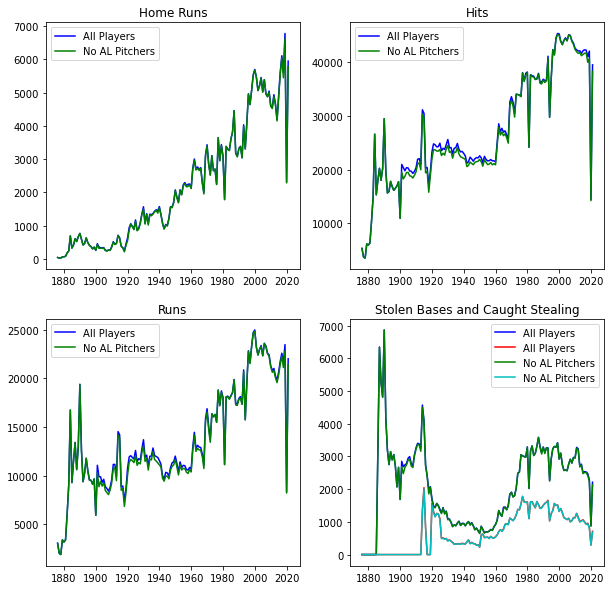

In [18]:
compare_plot(batting_year, batting_noALpitchers_year, 'All Players', 'No AL Pitchers', per_player = False)

Don't see very much change in total numbers of any of the stats plotted above. Which seems to support the hypothesis that including pitchers in the calculations brings down the average per player stats.

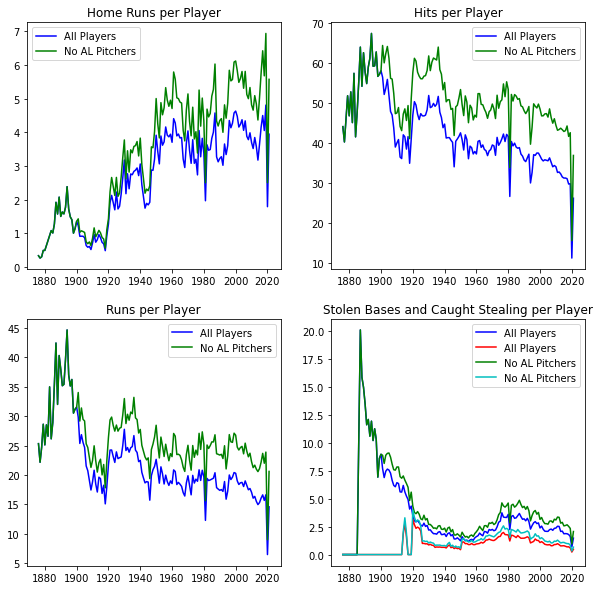

In [19]:
compare_plot(batting_year, batting_noALpitchers_year, 'All Players', 'No AL Pitchers', per_player = True)

In [26]:
print('2021 home runs per player with all players included:', batting_year.loc[145, 'HR_perplayer'].round(2))
print('2021 home runs per player with AL pitchers not included:', batting_noALpitchers_year.loc[145, 'HR_perplayer'].round(2))

2021 home runs per player with all players included: 3.94
2021 home runs per player with AL pitchers not included: 5.57


Just taking out AL pitchers increases the HR per player by 1.63. I'm thinking removing all pitchers will increase it even more.

### Scenario 2:

Batting stats with no pitchers

In [27]:
pitchers = pitching[['yearID','playerID']]

outer = batting.merge(pitchers, how = 'outer', on = ['yearID','playerID'], indicator = True)
batting_nopitchers = outer[(outer._merge == 'left_only')].drop('_merge', axis = 1)
batting_nopitchers

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,addybo01,1876,1,CHN,NL,32,142,36,40,4,...,16.0,NaN,NaN,5,0.0,NaN,NaN,NaN,NaN,NaN
1,allisar01,1876,1,LS1,NL,31,130,9,27,2,...,10.0,NaN,NaN,2,6.0,NaN,NaN,NaN,NaN,NaN
2,allisdo01,1876,1,HAR,NL,44,163,19,43,4,...,15.0,NaN,NaN,3,9.0,NaN,NaN,NaN,NaN,NaN
3,andrufr01,1876,1,CHN,NL,8,36,6,11,3,...,2.0,NaN,NaN,0,5.0,NaN,NaN,NaN,NaN,NaN
4,ansonca01,1876,1,CHN,NL,66,309,63,110,9,...,59.0,NaN,NaN,12,8.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117729,youngan02,2021,1,ARI,NL,58,91,13,19,7,...,15.0,0.0,0.0,6,45.0,0.0,6.0,0.0,1.0,3.0
117731,zavalse01,2021,1,CHA,AL,37,93,15,17,3,...,15.0,0.0,0.0,6,41.0,0.0,1.0,4.0,0.0,1.0
117734,zimmebr01,2021,1,CLE,AL,99,299,44,68,9,...,35.0,15.0,3.0,30,122.0,0.0,15.0,0.0,4.0,3.0
117738,zimmery01,2021,1,WAS,NL,110,255,27,62,16,...,46.0,0.0,0.0,16,77.0,0.0,0.0,0.0,2.0,9.0


In [31]:
#combining into years
batting_nopitchers_year = batting_nopitchers.groupby(['yearID']).sum()
batting_nopitchers_year['num_players'] = batting_nopitchers.groupby('yearID')['playerID'].nunique()
batting_nopitchers_year['num_teams'] = batting_nopitchers.groupby('yearID')['teamID'].nunique()

#adding the per player columns
batting_nopitchers_year['HR_perplayer'] = batting_nopitchers_year['HR'] / batting_nopitchers_year['num_players']
batting_nopitchers_year['R_perplayer'] = batting_nopitchers_year['R'] / batting_nopitchers_year['num_players']
batting_nopitchers_year['H_perplayer'] = batting_nopitchers_year['H'] / batting_nopitchers_year['num_players']
batting_nopitchers_year['SB_perplayer'] = batting_nopitchers_year['SB'] / batting_nopitchers_year['num_players']
batting_nopitchers_year['CS_perplayer'] = batting_nopitchers_year['CS'] / batting_nopitchers_year['num_players']
batting_nopitchers_year.reset_index(inplace = True)
batting_nopitchers_year

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,...,SH,SF,GIDP,num_players,num_teams,HR_perplayer,R_perplayer,H_perplayer,SB_perplayer,CS_perplayer
0,1876,93,3224,13832,2084,3594,417,125,32,1352.0,...,0.0,0.0,0.0,87,8,0.367816,23.954023,41.310345,0.000000,0.000000
1,1877,87,2451,10418,1588,2876,338,148,21,1086.0,...,0.0,0.0,0.0,73,6,0.287671,21.753425,39.397260,0.000000,0.000000
2,1878,60,2637,10959,1586,2923,394,105,18,1058.0,...,0.0,0.0,0.0,56,6,0.321429,28.321429,52.196429,0.000000,0.000000
3,1879,108,4765,19972,2861,5188,834,277,49,2000.0,...,0.0,0.0,0.0,94,8,0.521277,30.436170,55.191489,0.000000,0.000000
4,1880,107,4532,17972,2342,4406,740,243,48,1629.0,...,0.0,0.0,0.0,95,8,0.505263,24.652632,46.378947,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,2017,695,48509,156447,21727,40527,8098,768,5943,20751.0,...,435.0,1122.0,3634.0,603,30,9.855721,36.031509,67.208955,4.069652,1.504146
142,2018,697,46241,150345,20148,38003,7702,796,5232,19113.0,...,371.0,1135.0,3160.0,580,30,9.020690,34.737931,65.522414,4.022414,1.560345
143,2019,683,46136,151356,21952,38968,7966,747,6422,21032.0,...,295.0,1069.0,3175.0,579,30,11.091537,37.913644,67.302245,3.747841,1.322971
144,2020,624,18016,57099,8106,13997,2717,236,2256,7765.0,...,117.0,390.0,1186.0,554,30,4.072202,14.631769,25.265343,1.552347,0.519856


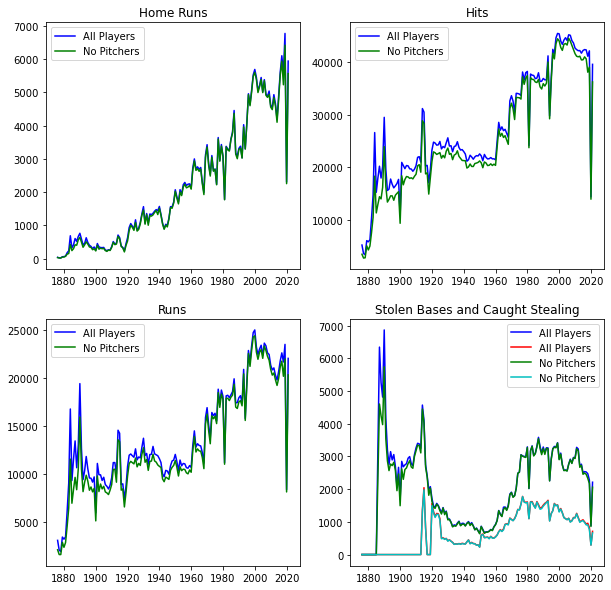

In [32]:
compare_plot(batting_year, batting_nopitchers_year, 'All Players', 'No Pitchers', per_player = False)

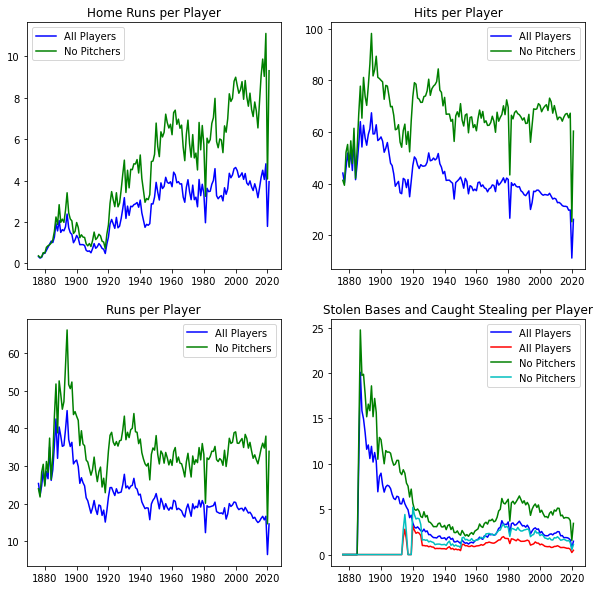

In [33]:
compare_plot(batting_year, batting_nopitchers_year, 'All Players', 'No Pitchers', per_player = True)

In [35]:
print('2021 home runs per player with all players included:', batting_year.loc[145, 'HR_perplayer'].round(2))
print('2021 home runs per player with pitchers not included:', batting_nopitchers_year.loc[145, 'HR_perplayer'].round(2))

2021 home runs per player with all players included: 3.94
2021 home runs per player with pitchers not included: 9.29


Wow! The number of runs runs per player more than doubled when the pitchers were removed from the calculation.

### Scenario 3:

Compare only pitchers batting numbers vs All other players batting numbers

In [36]:
#already have data for all the players other than pitchers in batting_nopitchers and batting_nopitchers_year
#Not to get only the stats for just pitchers
batting_onlypitchers = pitchers.merge(batting, on = ['yearID','playerID'], how = 'left')

In [37]:
#combining into years
batting_onlypitchers_year = batting_onlypitchers.groupby(['yearID']).sum()
batting_onlypitchers_year['num_players'] = batting_onlypitchers.groupby('yearID')['playerID'].nunique()
batting_onlypitchers_year['num_teams'] = batting_onlypitchers.groupby('yearID')['teamID'].nunique()

#adding the per player columns
batting_onlypitchers_year['HR_perplayer'] = batting_onlypitchers_year['HR'] / batting_onlypitchers_year['num_players']
batting_onlypitchers_year['R_perplayer'] = batting_onlypitchers_year['R'] / batting_onlypitchers_year['num_players']
batting_onlypitchers_year['H_perplayer'] = batting_onlypitchers_year['H'] / batting_onlypitchers_year['num_players']
batting_onlypitchers_year['SB_perplayer'] = batting_onlypitchers_year['SB'] / batting_onlypitchers_year['num_players']
batting_onlypitchers_year['CS_perplayer'] = batting_onlypitchers_year['CS'] / batting_onlypitchers_year['num_players']
batting_onlypitchers_year.reset_index(inplace = True)
batting_onlypitchers_year

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,...,SH,SF,GIDP,num_players,num_teams,HR_perplayer,R_perplayer,H_perplayer,SB_perplayer,CS_perplayer
0,1876,34,1472,6289,982,1744,216,56,8,632.0,...,0.0,0.0,0.0,34,8,0.235294,28.882353,51.294118,0.000000,0.000000
1,1877,19,796,3249,452,829,93,56,3,324.0,...,0.0,0.0,0.0,19,6,0.157895,23.789474,43.631579,0.000000,0.000000
2,1878,26,697,2739,320,626,89,27,5,279.0,...,0.0,0.0,0.0,21,6,0.238095,15.238095,29.809524,0.000000,0.000000
3,1879,30,1105,4510,590,1066,130,43,9,386.0,...,0.0,0.0,0.0,25,8,0.360000,23.600000,42.640000,0.000000,0.000000
4,1880,39,1651,6424,857,1556,242,87,14,595.0,...,0.0,0.0,0.0,32,8,0.437500,26.781250,48.625000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,2017,1219,25565,9486,875,1737,306,28,166,846.0,...,521.0,47.0,174.0,755,30,0.219868,1.158940,2.300662,0.096689,0.035762
142,2018,1368,28802,15461,1508,3059,568,51,358,1512.0,...,471.0,103.0,304.0,799,30,0.448060,1.887359,3.828536,0.178974,0.066333
143,2019,1401,28929,15781,1544,3125,571,39,359,1462.0,...,514.0,81.0,296.0,831,30,0.432010,1.858002,3.760529,0.133574,0.080626
144,2020,914,9178,1931,238,442,106,5,48,213.0,...,9.0,12.0,51.0,735,30,0.065306,0.323810,0.601361,0.034014,0.005442


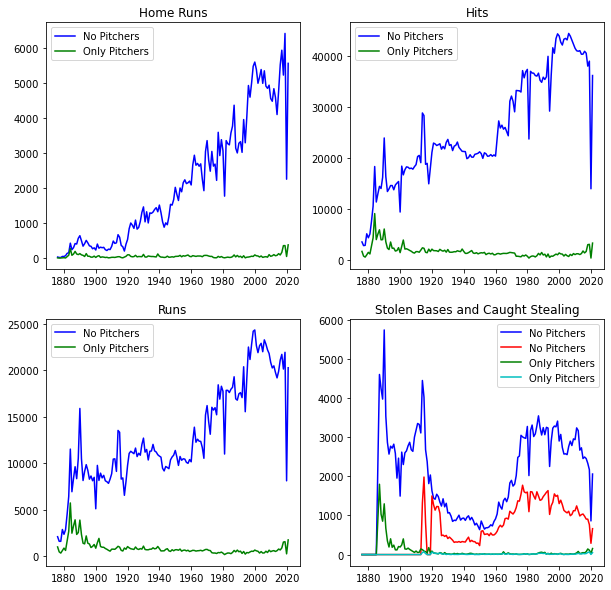

In [38]:
compare_plot(batting_nopitchers_year, batting_onlypitchers_year, 'No Pitchers', 'Only Pitchers', per_player = False)

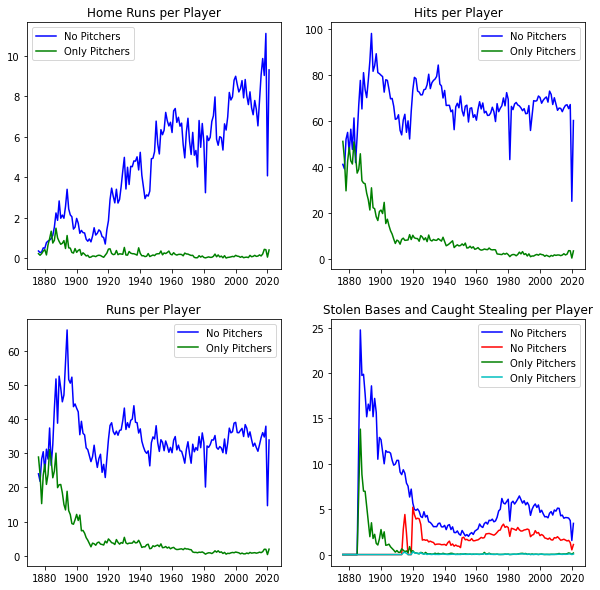

In [39]:
compare_plot(batting_nopitchers_year, batting_onlypitchers_year, 'No Pitchers', 'Only Pitchers', per_player = True)

In [45]:
print('2021 home runs per player with all players included:', batting_nopitchers_year.loc[145, 'HR_perplayer'].round(2))
print('2021 home runs per player with pitchers not included:', batting_onlypitchers_year.loc[145, 'HR_perplayer'].round(2))
print('Non-pitching players hit homeruns', (batting_nopitchers_year.loc[145, 'HR_perplayer']
      /batting_onlypitchers_year.loc[145, 'HR_perplayer']).round(1), 'times as much as pitchers')

2021 home runs per player with all players included: 9.29
2021 home runs per player with pitchers not included: 0.42
Non-pitching players hit homeruns 22.2 times as much as pitchers


## Pitching Trends

Want to see if pitchers have gotten better over the years. So has the number of runs/hit/home runs allowed decreased? And number of strikeouts increased?

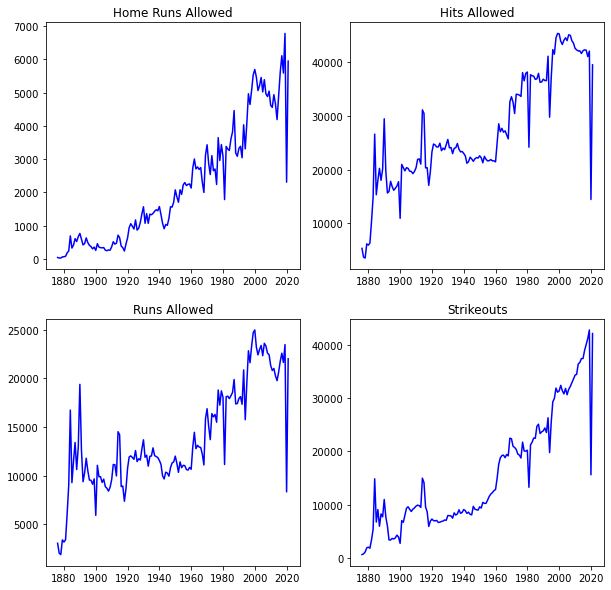

In [46]:
fig, ax = plt.subplots(2,2, figsize = (10,10))
ax[0,0].plot(pitching_year['yearID'], pitching_year['HR'], color = 'b')
ax[0,0].set_title('Home Runs Allowed')
ax[1,0].plot(pitching_year['yearID'], pitching_year['R'], color = 'b')
ax[1,0].set_title('Runs Allowed')
ax[0,1].plot(pitching_year['yearID'], pitching_year['H'], color = 'b')
ax[0,1].set_title('Hits Allowed')
ax[1,1].plot(pitching_year['yearID'], pitching_year['SO'], color = 'b')
ax[1,1].set_title('Strikeouts')
plt.show()

As with the batter data, it makes sense that there would be an increase in homeruns, runs, hits and strikeouts. But I want to see if the number each pitcher allows increases as well, or if the increase is simply due to the increase in people playing.

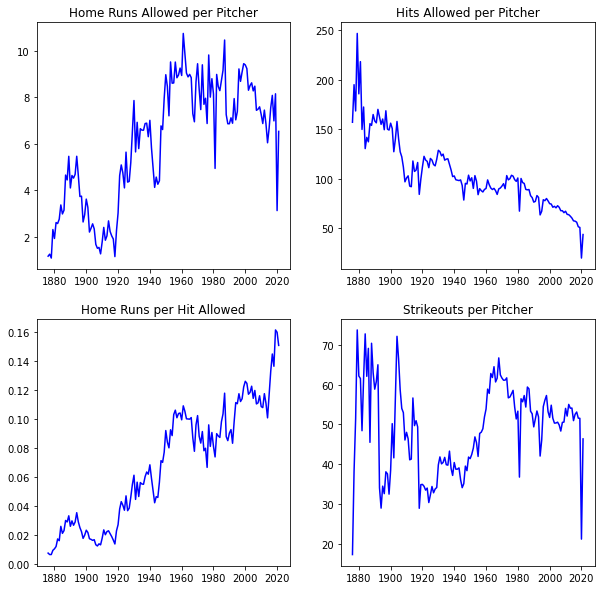

In [47]:
fig, ax = plt.subplots(2,2, figsize = (10,10))
ax[0,0].plot(pitching_year['yearID'], pitching_year['HR']/pitching_year['num_players'], color = 'b')
ax[0,0].set_title('Home Runs Allowed per Pitcher')
ax[1,0].plot(pitching_year['yearID'], pitching_year['HR']/pitching_year['H'], color = 'b')
ax[1,0].set_title('Home Runs per Hit Allowed')
ax[0,1].plot(pitching_year['yearID'], pitching_year['H']/pitching_year['num_players'], color = 'b')
ax[0,1].set_title('Hits Allowed per Pitcher')
ax[1,1].plot(pitching_year['yearID'], pitching_year['SO']/pitching_year['num_players'], color = 'b')
ax[1,1].set_title('Strikeouts per Pitcher')
plt.show()

Home runs allowed per pitcher went up then mostly stabled out from the 1950s-2020s. Hits allowed per pitcher have done the opposite, they have continued to decrease. Which is why I looked at the ratio of home runs per hit. This number has gone up. This means that although the total number of runs a pitcher allows has gone down (improvement), they still allow the same number of home runs. So home runs make up a larger proportion of hits than they did at the beginning of this dataset.